In [81]:
import pandas as pd
import numpy as np


In [82]:
ev = pd.read_csv("/content/drive/MyDrive/Unified internship 2025/Project/Electric Vehicle Sales by State in India.csv")

In [83]:
ev.head(5)


,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


In [84]:
ev.isnull().sum()

,0
Year,0
Month_Name,0
Date,0
State,0
Vehicle_Class,0
Vehicle_Category,0
Vehicle_Type,0
EV_Sales_Quantity,0


In [85]:
ev.duplicated().sum()

np.int64(0)

In [86]:
ev.describe()

,Year,EV_Sales_Quantity
count,96845.000000,96845.000000
mean,2018.622768,37.108896
std,2.895581,431.566675
min,2014.000000,0.000000
25%,2016.000000,0.000000
50%,2019.000000,0.000000
75%,2021.000000,0.000000
max,2024.000000,20584.000000


In [87]:
ev.dtypes

,0
Year,float64
Month_Name,object
Date,object
State,object
Vehicle_Class,object
Vehicle_Category,object
Vehicle_Type,object
EV_Sales_Quantity,float64


In [88]:
ev["Year"] = ev["Year"].astype(int)
ev["Year"]

,Year
0,2014
1,2014
2,2014
3,2014
4,2014
...,...
96840,2023
96841,2023
96842,2023
96843,2023


In [89]:
ev["Month_Name"] = ev["Month_Name"].str.capitalize()
ev["Month_Name"]

,Month_Name
0,Jan
1,Jan
2,Jan
3,Jan
4,Jan
...,...
96840,Dec
96841,Dec
96842,Dec
96843,Dec


In [90]:
ev["Date"] = pd.to_datetime(ev["Date"])
ev["Quarter"] = ev["Date"].dt.quarter
ev["Quarter"]

,Quarter
0,1
1,1
2,1
3,1
4,1
...,...
96840,4
96841,4
96842,4
96843,4


In [91]:
ev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Year               96845 non-null  int64         
 1   Month_Name         96845 non-null  object        
 2   Date               96845 non-null  datetime64[ns]
 3   State              96845 non-null  object        
 4   Vehicle_Class      96845 non-null  object        
 5   Vehicle_Category   96845 non-null  object        
 6   Vehicle_Type       96845 non-null  object        
 7   EV_Sales_Quantity  96845 non-null  float64       
 8   Quarter            96845 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(5)
memory usage: 6.3+ MB


In [92]:
ev.head(5)

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity,Quarter
0,2014,Jan,2014-01-01,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0,1
1,2014,Jan,2014-01-01,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0,1
2,2014,Jan,2014-01-01,Andhra Pradesh,AMBULANCE,Others,Others,0.0,1
3,2014,Jan,2014-01-01,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0,1
4,2014,Jan,2014-01-01,Andhra Pradesh,BUS,Bus,Bus,0.0,1


In [93]:
ev.groupby(["Year"]).agg({"EV_Sales_Quantity" : "sum"}).reset_index()

,Year,EV_Sales_Quantity
0,2014,2392.0
1,2015,7805.0
2,2016,49855.0
3,2017,87420.0
4,2018,130254.0
5,2019,166819.0
6,2020,124684.0
7,2021,331498.0
8,2022,1024723.0
9,2023,1525179.0


In [94]:
ev.groupby(["State"]).agg({"EV_Sales_Quantity" : "sum"}).sort_values(by = "EV_Sales_Quantity", ascending = False).reset_index()

,State,EV_Sales_Quantity
0,Uttar Pradesh,732074.0
1,Maharashtra,401535.0
2,Karnataka,315498.0
3,Delhi,268538.0
4,Rajasthan,228573.0
5,Bihar,213465.0
6,Tamil Nadu,206902.0
7,Gujarat,176713.0
8,Assam,151917.0
9,Kerala,133246.0


In [95]:
ev.groupby(["Vehicle_Class"]).agg({"EV_Sales_Quantity" : "sum"})

,EV_Sales_Quantity
Vehicle_Class,
ADAPTED VEHICLE,175.0
AGRICULTURAL TRACTOR,121.0
AMBULANCE,3.0
ANIMAL AMBULANCE,0.0
ARMOURED/SPECIALISED VEHICLE,0.0
...,...
TREE TRIMMING VEHICLE,0.0
VEHICLE FITTED WITH COMPRESSOR,0.0
VEHICLE FITTED WITH GENERATOR,0.0


In [96]:
ev.groupby(["Vehicle_Category","Vehicle_Type"]).agg({"EV_Sales_Quantity" : "sum"})

EV_Sales_Quantity
Vehicle_Category Vehicle_Type                         
2-Wheelers       2W_Personal                 1796340.0
                 2W_Shared                     11765.0
3-Wheelers       3W_Goods                      44974.0
                 3W_Goods_LowSpeed             90656.0
                 3W_Personal                     421.0
                 3W_Shared                     76132.0
                 3W_Shared_LowSpeed          1408127.0
4-Wheelers       4W_Personal                  130676.0
                 4W_Shared                     19099.0
Bus              Bus                            7009.0
                 Institution Bus                   0.0
Others           Others                         8612.0

In [97]:
ev.groupby("Quarter").agg({"EV_Sales_Quantity" : "sum"})

,EV_Sales_Quantity
Quarter,
1,889330.0
2,724695.0
3,877928.0
4,1101858.0


In [98]:
month_order = ["Jan","Feb","Mar" , "Apr", "May", "Jun", "Jul", "Aug" ,"Sep", "Oct" , "Nov" , "Dec"]
ev["Month_Name"] = pd.Categorical(ev["Month_Name"], categories = month_order, ordered = True)

In [99]:
ev.groupby(["Month_Name"],observed =True).agg({"EV_Sales_Quantity" : "sum"}).sort_values(by=["Month_Name"]).reset_index()

,Month_Name,EV_Sales_Quantity
0,Jan,360703.0
1,Feb,228739.0
2,Mar,299888.0
3,Apr,232194.0
4,May,262747.0
5,Jun,229754.0
6,Jul,270473.0
7,Aug,294022.0
8,Sep,313433.0
9,Oct,355083.0


In [100]:
Mvv = ev.groupby(["Month_Name","Vehicle_Category","Vehicle_Type"], observed=True).agg({"EV_Sales_Quantity" : "sum"}).head(30)
Mvv[Mvv["EV_Sales_Quantity"] > 0]

EV_Sales_Quantity
Month_Name Vehicle_Category Vehicle_Type                         
Jan        2-Wheelers       2W_Personal                  185693.0
                            2W_Shared                      2099.0
           3-Wheelers       3W_Goods                       4032.0
                            3W_Goods_LowSpeed              9023.0
                            3W_Personal                      48.0
                            3W_Shared                      9445.0
                            3W_Shared_LowSpeed           134366.0
           4-Wheelers       4W_Personal                   11923.0
                            4W_Shared                      2416.0
           Bus              Bus                             828.0
           Others           Others                          830.0
Feb        2-Wheelers       2W_Personal                  113260.0
                            2W_Shared                      1182.0
           3-Wheelers       3W_Goods                       2382.0
                            3W_Goods_LowSpeed              7485.0
                            3W_Personal                      27.0
                            3W_Shared                      2768.0
                            3W_Shared_LowSpeed            91812.0
           4-Wheelers       4W_Personal                    7789.0
                            4W_Shared                      1101.0
           Bus              Bus                             512.0
           Others           Others                          421.0
Mar        2-Wheelers       2W_Personal                  161671.0
                            2W_Shared                       769.0
           3-Wheelers       3W_Goods                       3963.0
                            3W_Goods_LowSpeed              9203.0
                            3W_Personal                      57.0
                            3W_Shared                      3772.0

In [101]:
State_UP = ev[ev["State"]=="Uttar Pradesh"]
State_UP

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity,Quarter
660,2014,Jan,2014-01-01,Uttar Pradesh,ADAPTED VEHICLE,Others,Others,0.0,1
661,2014,Jan,2014-01-01,Uttar Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0,1
662,2014,Jan,2014-01-01,Uttar Pradesh,AMBULANCE,Others,Others,0.0,1
663,2014,Jan,2014-01-01,Uttar Pradesh,ARTICULATED VEHICLE,Others,Others,0.0,1
664,2014,Jan,2014-01-01,Uttar Pradesh,BUS,Bus,Bus,0.0,1
...,...,...,...,...,...,...,...,...,...
96672,2023,Dec,2023-12-01,Uttar Pradesh,TOWER WAGON,Others,Others,0.0,4
96673,2023,Dec,2023-12-01,Uttar Pradesh,TRACTOR (COMMERCIAL),Others,Others,0.0,4
96674,2023,Dec,2023-12-01,Uttar Pradesh,TRAILER (AGRICULTURAL),Others,Others,0.0,4
96675,2023,Dec,2023-12-01,Uttar Pradesh,TRAILER (COMMERCIAL),Others,Others,0.0,4


In [102]:
State_UP.groupby("Year").agg({"EV_Sales_Quantity" : "sum"}).sort_values(by="EV_Sales_Quantity", ascending = False)

,EV_Sales_Quantity
Year,
2023,277300.0
2022,162857.0
2021,66702.0
2019,55796.0
2018,53212.0
2017,40649.0
2020,31264.0
2024,27833.0
2016,15310.0


In [103]:
State_UP.groupby("Month_Name",observed = True).agg({"EV_Sales_Quantity" : "sum"}).sort_values(by="Month_Name")

,EV_Sales_Quantity
Month_Name,
Jan,75137.0
Feb,43352.0
Mar,51864.0
Apr,44432.0
May,47105.0
Jun,52116.0
Jul,61091.0
Aug,65581.0
Sep,68053.0


In [104]:
State_UP.groupby("Quarter").agg({"EV_Sales_Quantity" : "sum"}).sort_values(by="Quarter")

,EV_Sales_Quantity
Quarter,
1,170353.0
2,143653.0
3,194725.0
4,223343.0


In [105]:
State_UP.groupby("Vehicle_Class").agg({"EV_Sales_Quantity" : "sum"}).sort_values(by="EV_Sales_Quantity", ascending = False).head(20)

,EV_Sales_Quantity
Vehicle_Class,
E-RICKSHAW(P),596325.0
M-CYCLE/SCOOTER,80864.0
E-RICKSHAW WITH CART (G),25502.0
THREE WHEELER (PASSENGER),18584.0
MOTOR CAR,5301.0
MOTORISED CYCLE (CC > 25CC),2296.0
THREE WHEELER (GOODS),1495.0
BUS,748.0
MOPED,518.0


In [106]:
State_UP.groupby(["Vehicle_Category","Vehicle_Type"]).agg({"EV_Sales_Quantity" : "sum"})

EV_Sales_Quantity
Vehicle_Category Vehicle_Type                         
2-Wheelers       2W_Personal                   83734.0
                 2W_Shared                        35.0
3-Wheelers       3W_Goods                       1495.0
                 3W_Goods_LowSpeed             25502.0
                 3W_Personal                       0.0
                 3W_Shared                     18584.0
                 3W_Shared_LowSpeed           596325.0
4-Wheelers       4W_Personal                    5301.0
                 4W_Shared                       145.0
Bus              Bus                             748.0
                 Institution Bus                   0.0
Others           Others                          205.0

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

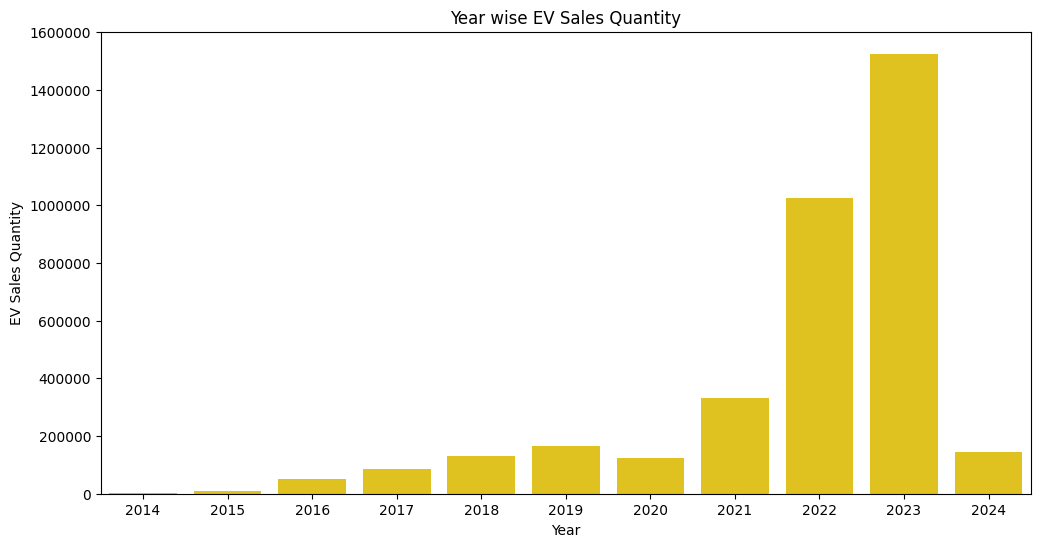

In [108]:
plt.figure(figsize=(12,6))
sns.barplot(data= ev.groupby(["Year"]).agg({"EV_Sales_Quantity" : "sum"}).reset_index(),x="Year",y="EV_Sales_Quantity",color = "gold")
plt.title("Year wise EV Sales Quantity")
plt.xlabel("Year")
plt.ticklabel_format(style="plain", axis="y")
plt.ylabel("EV Sales Quantity")
plt.show()

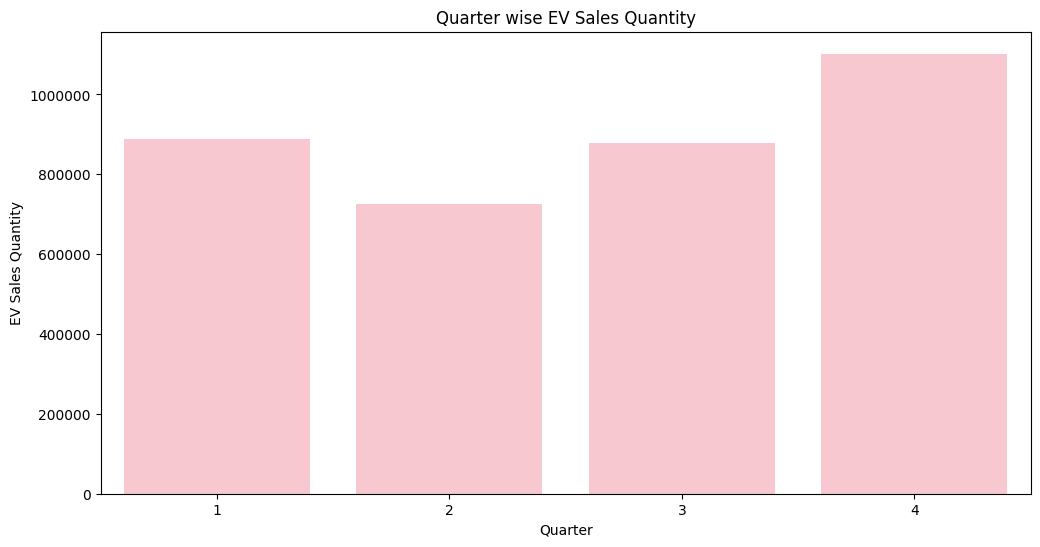

In [109]:
plt.figure(figsize=(12,6))
sns.barplot(data= ev.groupby(["Quarter"]).agg({"EV_Sales_Quantity" : "sum"}).reset_index(),x="Quarter",y="EV_Sales_Quantity", color= "pink")
plt.title("Quarter wise EV Sales Quantity")
plt.xlabel("Quarter")
plt.ylabel("EV Sales Quantity")
plt.ticklabel_format(style="plain", axis="y")
plt.show()

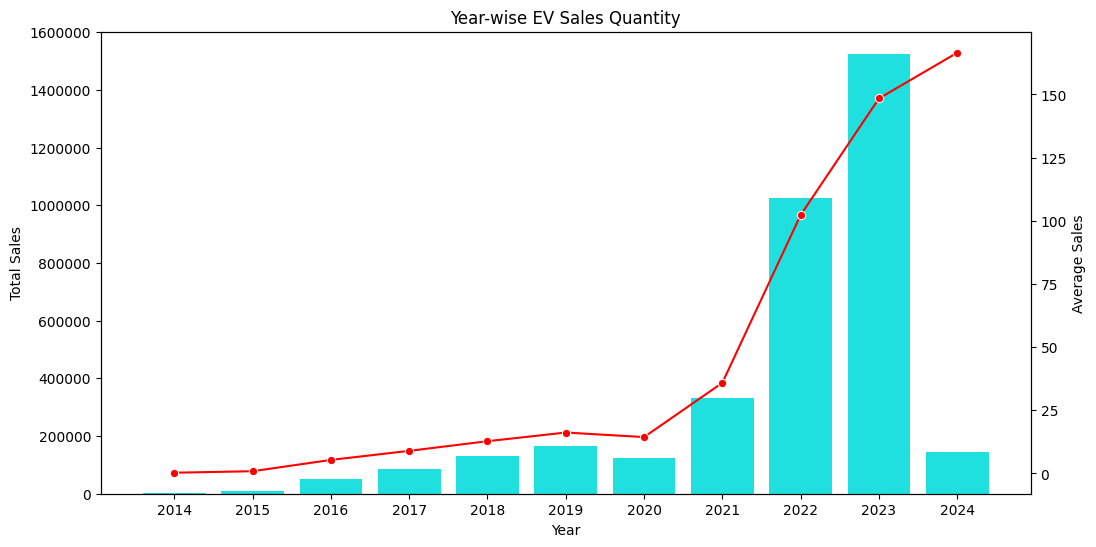

In [110]:


Total_sales = ev.groupby("Year").agg({"EV_Sales_Quantity" : "sum"}).reset_index().sort_values("Year")
Average_sales = ev.groupby("Year").agg({"EV_Sales_Quantity" : "mean"}).reset_index().sort_values("Year")

Total_sales["Year"] = Total_sales["Year"].astype(str)
Average_sales["Year"] = Average_sales["Year"].astype(str)

fig, ax1 = plt.subplots(figsize=(12, 6))

sns.barplot(data=Total_sales, x="Year", y="EV_Sales_Quantity", color="cyan")
ax1.set_ylabel("Total Sales")
ax1.set_xlabel("Year")
ax1.ticklabel_format(style="plain", axis="y")



ax2 = ax1.twinx()
sns.lineplot(data=Average_sales, x="Year", y="EV_Sales_Quantity", ax=ax2, color="red", marker="o")
ax2.set_ylabel("Average Sales")


plt.title("Year-wise EV Sales Quantity")

plt.show()


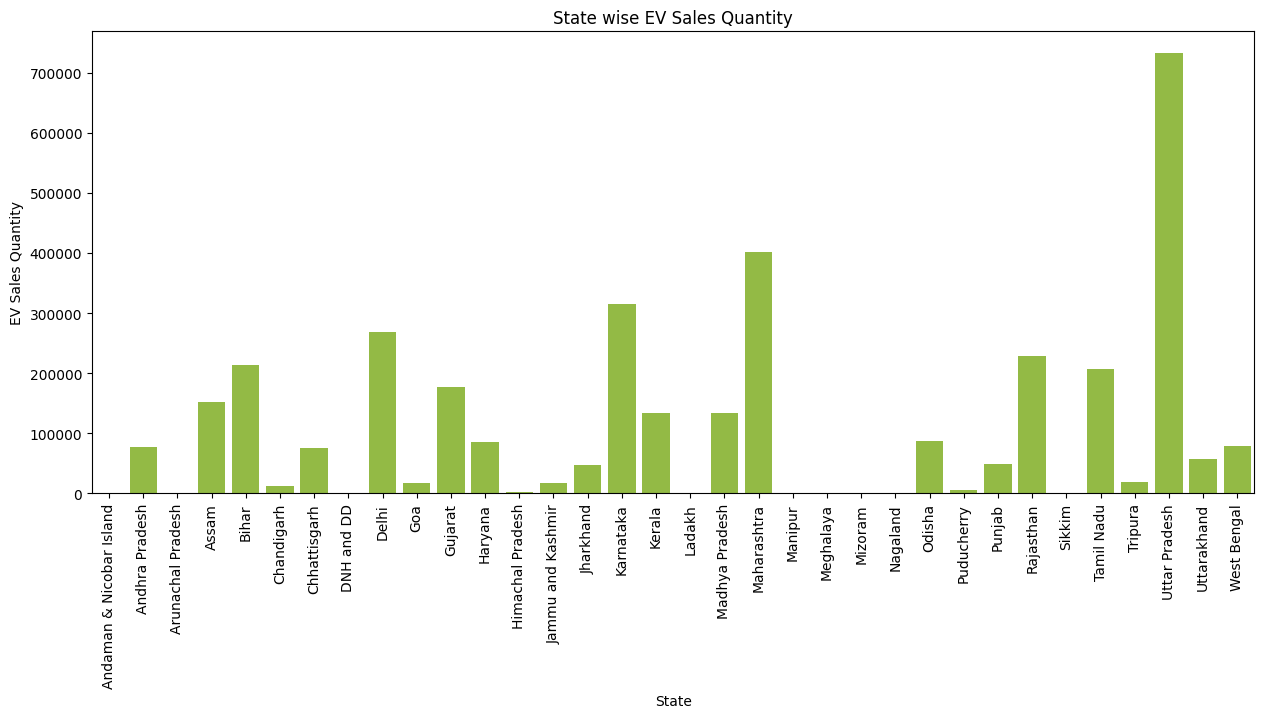

In [111]:
plt.figure(figsize=(15,6))
sns.barplot(data= ev.groupby(["State"]).agg({"EV_Sales_Quantity" : "sum"}).reset_index(), x="State", y="EV_Sales_Quantity", color = "yellowgreen" )
plt.title("State wise EV Sales Quantity")
plt.xlabel("State")
plt.ylabel("EV Sales Quantity")
plt.xticks(rotation=90)
plt.show()

In [112]:
month_order = ["Jan","Feb","Mar" , "Apr", "May", "Jun", "Jul", "Aug" ,"Sep", "Oct" , "Nov" , "Dec"]
ev["Month_Name"] = pd.Categorical(ev["Month_Name"], categories = month_order, ordered = True)

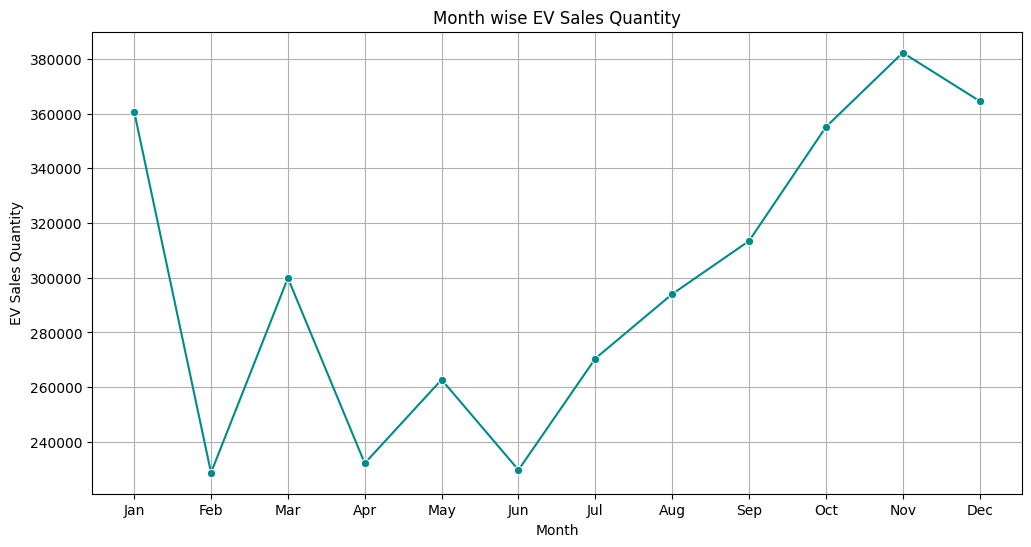

In [113]:
plt.figure(figsize=(12,6))
Month = ev.groupby("Month_Name",observed =True).agg({"EV_Sales_Quantity" : "sum"}).reset_index()
sns.lineplot(data= Month, x="Month_Name", y ="EV_Sales_Quantity", marker="o", color ="darkcyan")
plt.title("Month wise EV Sales Quantity")
plt.xlabel("Month" )
plt.ylabel("EV Sales Quantity")
plt.grid()
plt.show()

In [114]:
vc = ev.groupby("Vehicle_Class").agg({"EV_Sales_Quantity" : "sum"}).reset_index()
vc

,Vehicle_Class,EV_Sales_Quantity
0,ADAPTED VEHICLE,175.0
1,AGRICULTURAL TRACTOR,121.0
2,AMBULANCE,3.0
3,ANIMAL AMBULANCE,0.0
4,ARMOURED/SPECIALISED VEHICLE,0.0
...,...,...
68,TREE TRIMMING VEHICLE,0.0
69,VEHICLE FITTED WITH COMPRESSOR,0.0
70,VEHICLE FITTED WITH GENERATOR,0.0
71,VEHICLE FITTED WITH RIG,18.0


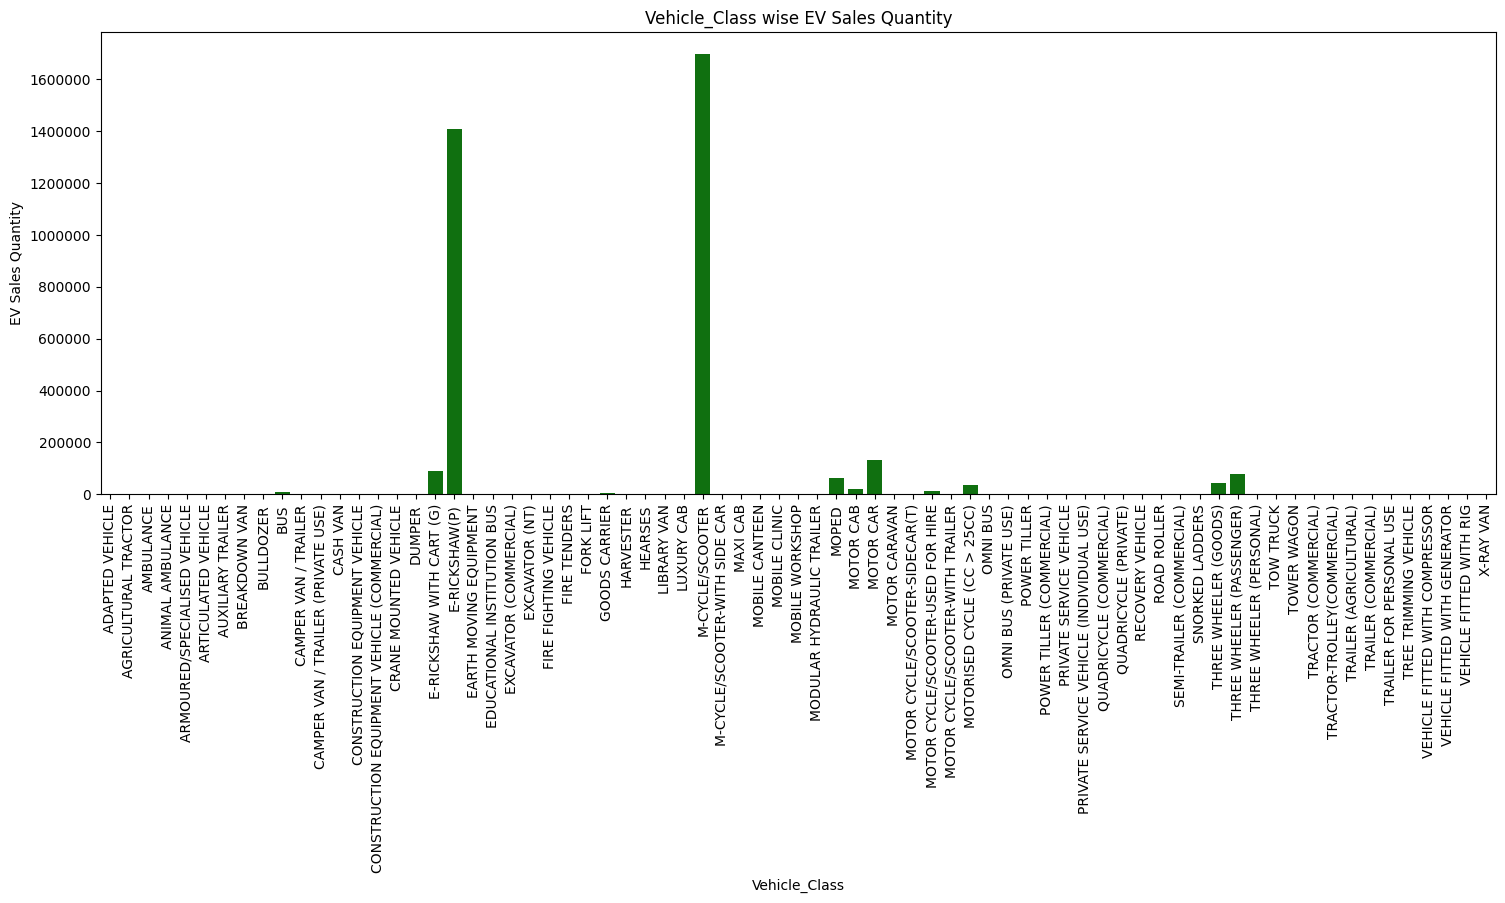

In [115]:
plt.figure(figsize=(18,6))
sns.barplot(data= vc, x="Vehicle_Class", y="EV_Sales_Quantity", color = "green")
plt.title("Vehicle_Class wise EV Sales Quantity")
plt.xlabel("Vehicle_Class")
plt.ylabel("EV Sales Quantity")
plt.xticks(rotation=90)
plt.ticklabel_format(style="plain", axis="y")
plt.show()

In [116]:
vt = ev.groupby("Vehicle_Type").agg({"EV_Sales_Quantity" : "sum"}).sort_values(by='EV_Sales_Quantity', ascending = False).reset_index().head(7)
vt

,Vehicle_Type,EV_Sales_Quantity
0,2W_Personal,1796340.0
1,3W_Shared_LowSpeed,1408127.0
2,4W_Personal,130676.0
3,3W_Goods_LowSpeed,90656.0
4,3W_Shared,76132.0
5,3W_Goods,44974.0
6,4W_Shared,19099.0


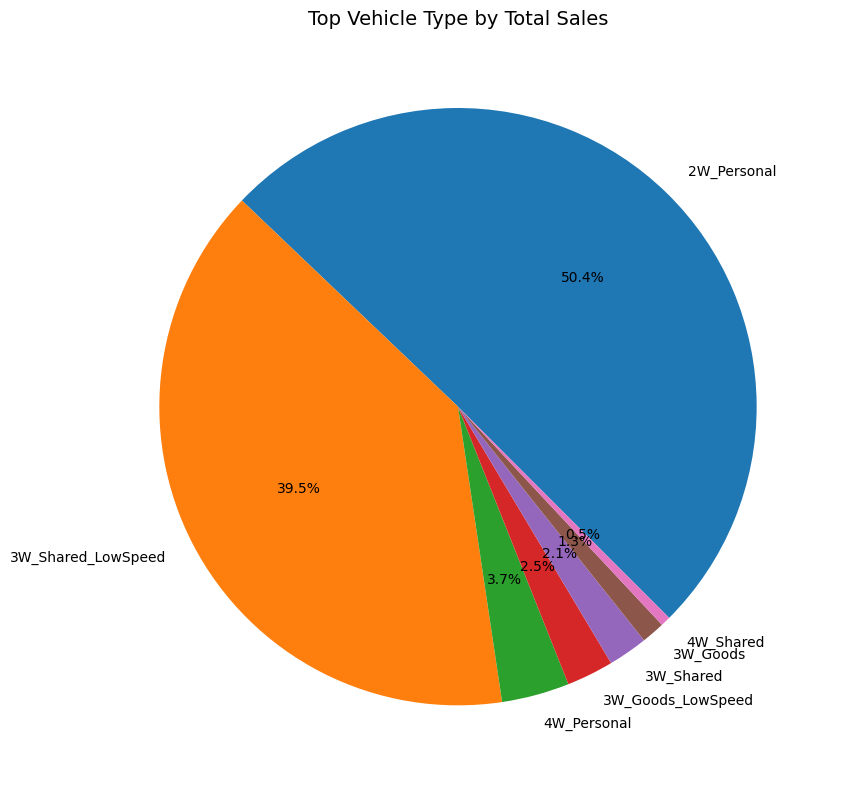

In [117]:
plt.figure(figsize=(10, 8))
plt.pie(vt["EV_Sales_Quantity"],labels=vt["Vehicle_Type"],autopct='%1.1f%%',  startangle=-45, labeldistance=1.1)
plt.title("Top Vehicle Type by Total Sales", fontsize=14)
plt.tight_layout()
plt.show()

In [118]:
vct = ev.groupby("Vehicle_Category").agg({"EV_Sales_Quantity" : "sum"}).sort_values(by='EV_Sales_Quantity', ascending = False).reset_index()
vct

,Vehicle_Category,EV_Sales_Quantity
0,2-Wheelers,1808105.0
1,3-Wheelers,1620310.0
2,4-Wheelers,149775.0
3,Others,8612.0
4,Bus,7009.0


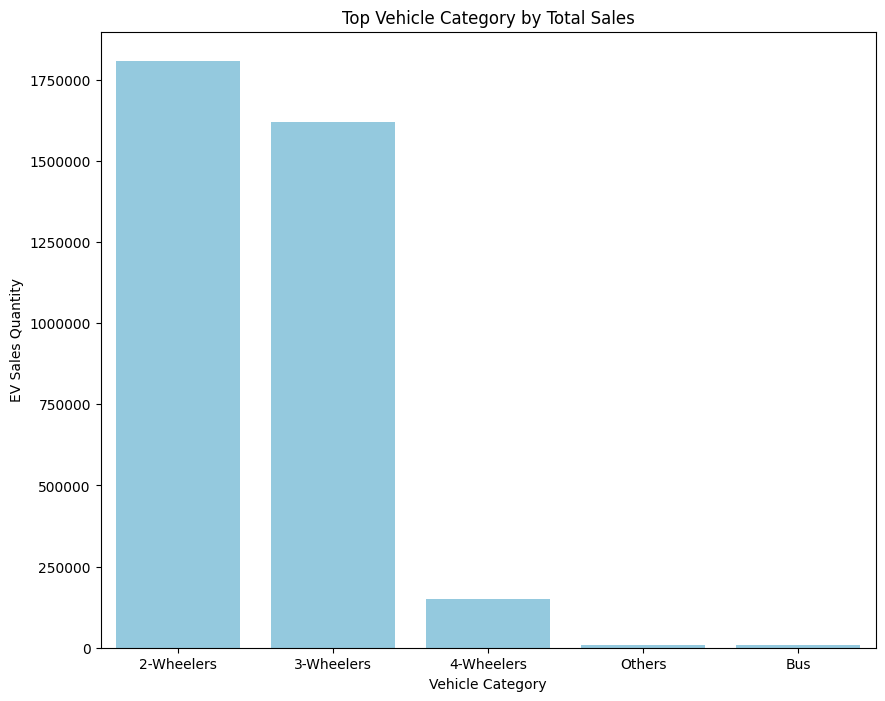

In [119]:
plt.figure(figsize=(10, 8))
sns.barplot(data = vct, x= "Vehicle_Category" , y="EV_Sales_Quantity", color = "skyblue")
plt.title("Top Vehicle Category by Total Sales", fontsize = 12)
plt.xlabel("Vehicle Category")
plt.ylabel("EV Sales Quantity")
plt.ticklabel_format(style="plain", axis="y")
plt.show()

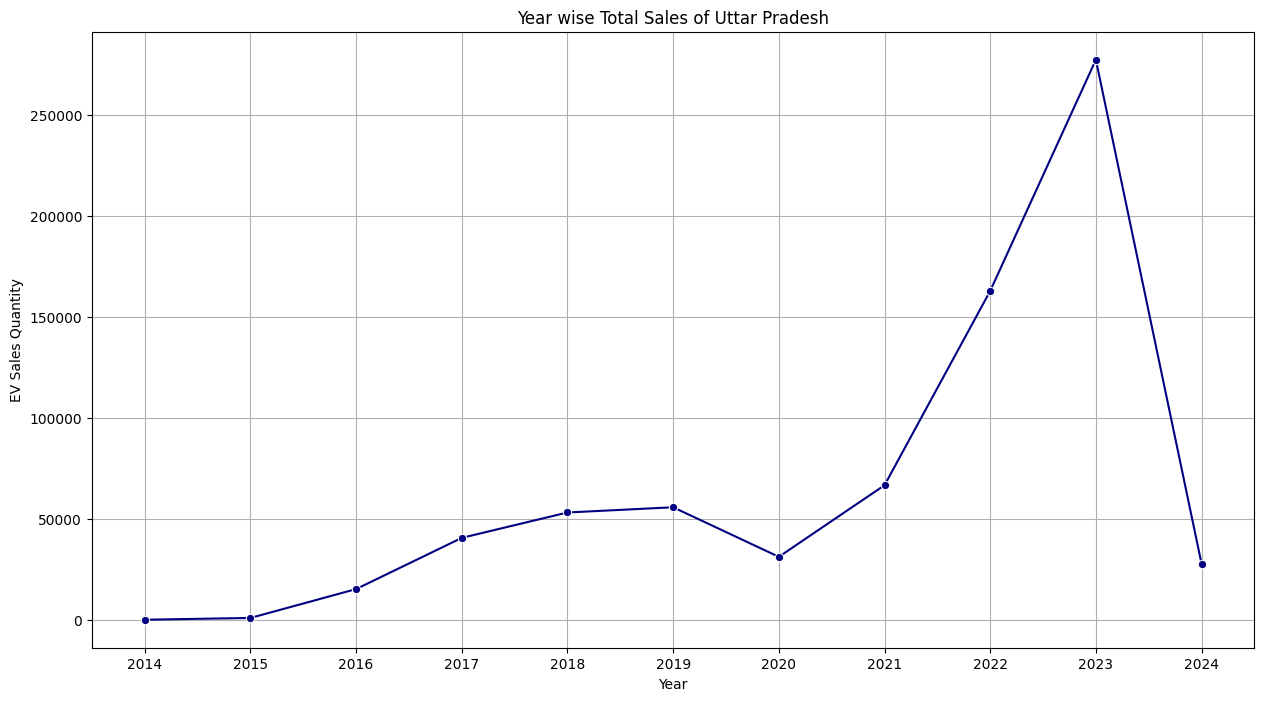

In [120]:
UP_y = State_UP.groupby("Year").agg({"EV_Sales_Quantity" : "sum"}).reset_index()
UP_y["Year"] = UP_y["Year"].astype(str)

plt.figure(figsize=(15, 8))
sns.lineplot(data = UP_y, x="Year" , y="EV_Sales_Quantity",color = "navy", marker= "o")
plt.title("Year wise Total Sales of Uttar Pradesh", fontsize = 12)
plt.xlabel("Year")
plt.ylabel("EV Sales Quantity")
plt.ticklabel_format(style="plain", axis="y")
plt.grid()
plt.show()

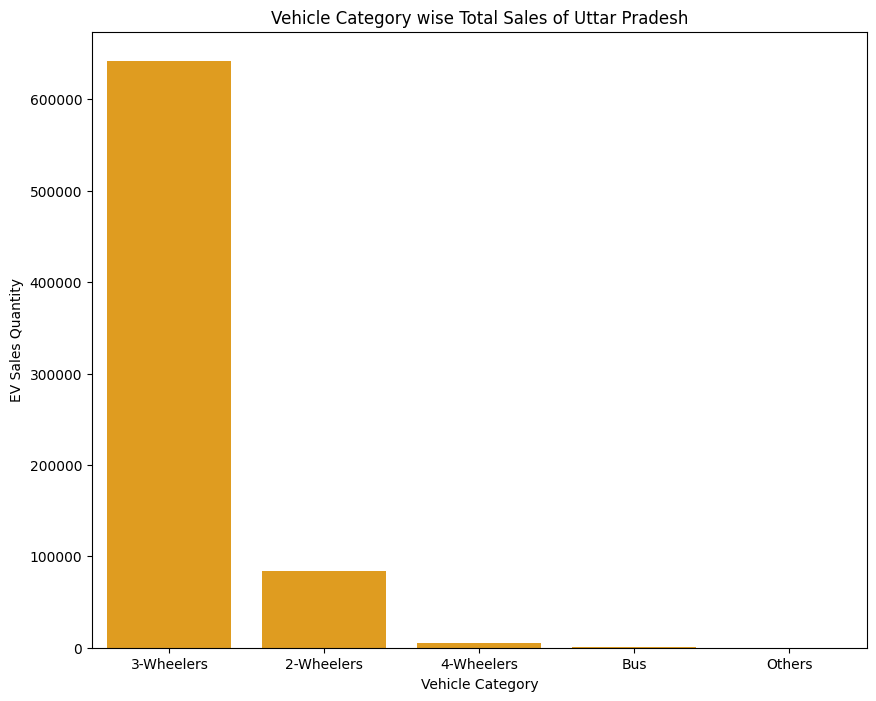

In [121]:
UP_ct = State_UP.groupby("Vehicle_Category").agg({"EV_Sales_Quantity" : "sum"}).sort_values(by="EV_Sales_Quantity", ascending = False).reset_index()
plt.figure(figsize=(10, 8))
sns.barplot(data = UP_ct, x= "Vehicle_Category" , y="EV_Sales_Quantity", color = "orange")
plt.title("Vehicle Category wise Total Sales of Uttar Pradesh", fontsize = 12)
plt.xlabel("Vehicle Category")
plt.ylabel("EV Sales Quantity")
plt.ticklabel_format(style="plain", axis="y")
plt.show()

In [122]:
Y_S = ev.groupby(["Year" , "State"]).agg({"EV_Sales_Quantity" : "sum"})
Year_wise_Top_State = Y_S.sort_values(["Year", "EV_Sales_Quantity"],ascending=[True, False]).groupby("Year").head(1).reset_index()
Year_wise_Top_State

,Year,State,EV_Sales_Quantity
0,2014,Maharashtra,905.0
1,2015,Delhi,3565.0
2,2016,Delhi,21688.0
3,2017,Uttar Pradesh,40649.0
4,2018,Uttar Pradesh,53212.0
5,2019,Uttar Pradesh,55796.0
6,2020,Uttar Pradesh,31264.0
7,2021,Uttar Pradesh,66702.0
8,2022,Uttar Pradesh,162857.0
9,2023,Uttar Pradesh,277300.0


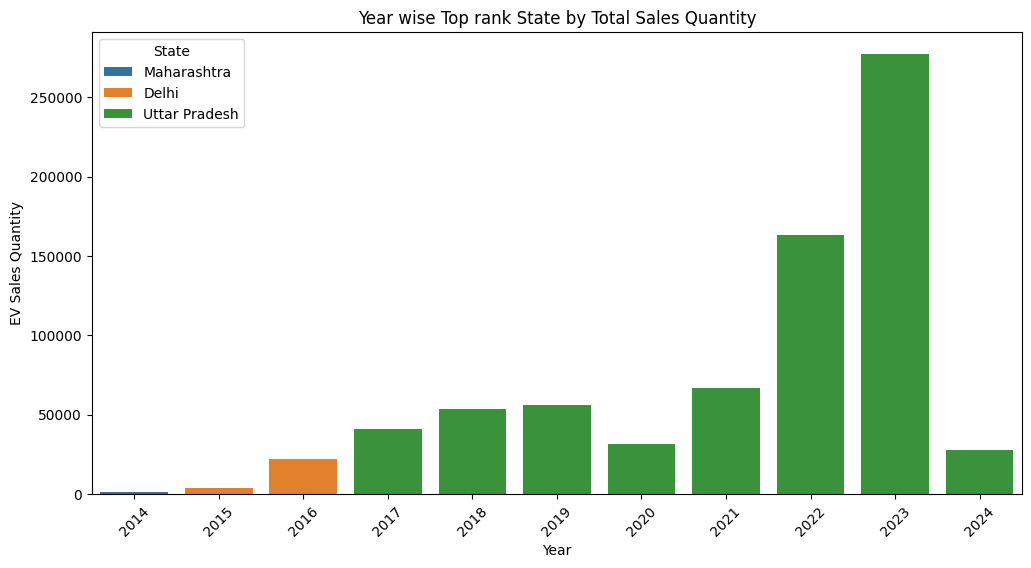

In [123]:
plt.figure(figsize=(12,6))
sns.barplot(data=Year_wise_Top_State, x="Year", y="EV_Sales_Quantity", hue="State")
plt.title("Year wise Top rank State by Total Sales Quantity")
plt.xlabel("Year")
plt.ylabel("EV Sales Quantity")
plt.xticks(rotation=45)
plt.show()

In [124]:
M_S = ev.groupby(["Month_Name","State"],observed=True).agg({"EV_Sales_Quantity" : "sum"}).reset_index()
M_S = M_S.sort_values(["EV_Sales_Quantity"], ascending =False).groupby("Month_Name",observed=True).head(1).reset_index(drop=True)
M_S = M_S.sort_values("Month_Name").reset_index(drop=True)
M_S


,Month_Name,State,EV_Sales_Quantity
0,Jan,Uttar Pradesh,75137.0
1,Feb,Uttar Pradesh,43352.0
2,Mar,Uttar Pradesh,51864.0
3,Apr,Uttar Pradesh,44432.0
4,May,Uttar Pradesh,47105.0
5,Jun,Uttar Pradesh,52116.0
6,Jul,Uttar Pradesh,61091.0
7,Aug,Uttar Pradesh,65581.0
8,Sep,Uttar Pradesh,68053.0
9,Oct,Uttar Pradesh,69579.0


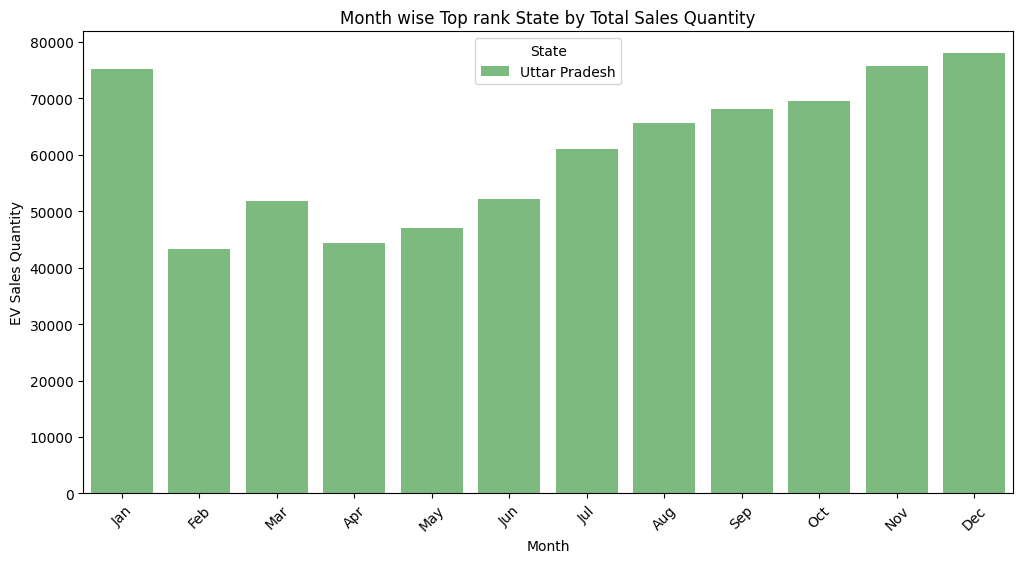

In [125]:
plt.figure(figsize=(12,6))
sns.barplot(data=M_S, x="Month_Name", y="EV_Sales_Quantity", hue="State", palette="Greens")
plt.title("Month wise Top rank State by Total Sales Quantity")
plt.xlabel("Month")
plt.ylabel("EV Sales Quantity")
plt.xticks(rotation=45)
plt.show()

In [126]:
Year_on_Year_change = ev.groupby("Year").agg({"EV_Sales_Quantity" : "sum"}).reset_index()
Year_on_Year_change["YOY"] = Year_on_Year_change["EV_Sales_Quantity"].pct_change()*100
Year_on_Year_change = Year_on_Year_change.round(2)
Year_on_Year_change

,Year,EV_Sales_Quantity,YOY
0,2014,2392.0,NaN
1,2015,7805.0,226.30
2,2016,49855.0,538.76
3,2017,87420.0,75.35
4,2018,130254.0,49.00
5,2019,166819.0,28.07
6,2020,124684.0,-25.26
7,2021,331498.0,165.87
8,2022,1024723.0,209.12
9,2023,1525179.0,48.84


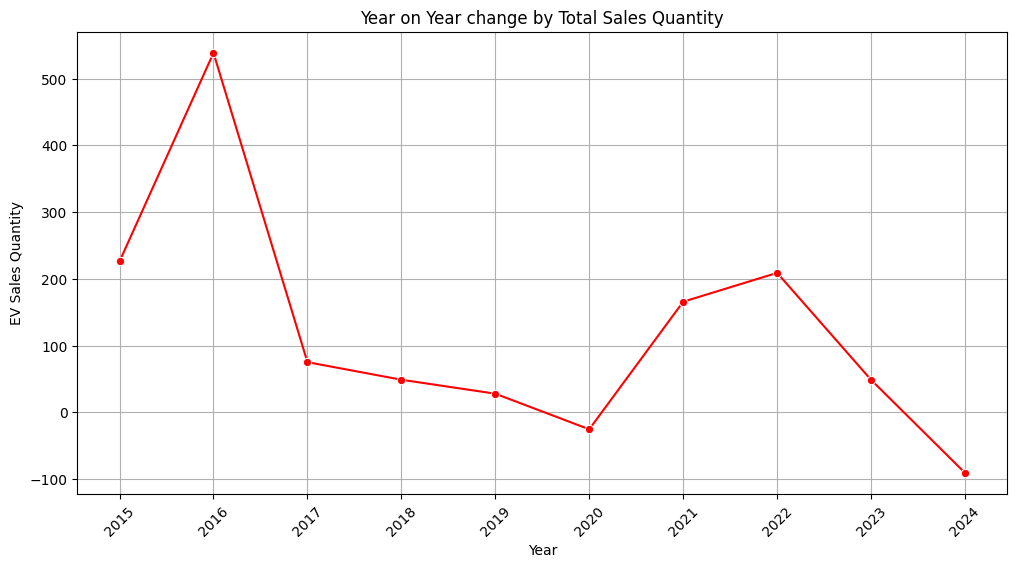

In [127]:
plt.figure(figsize=(12,6))

Year_on_Year_change["Year"] = Year_on_Year_change["Year"].astype(str)

sns.lineplot(data=Year_on_Year_change, x="Year", y="YOY",marker = "o", color = "red")
plt.title("Year on Year change by Total Sales Quantity")
plt.xlabel("Year")
plt.ylabel("EV Sales Quantity")
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [128]:
Month_on_Month_change = ev.groupby("Month_Name",observed=True).agg({"EV_Sales_Quantity" : "sum"}).reset_index()
Month_on_Month_change["MOM"] = Month_on_Month_change["EV_Sales_Quantity"].pct_change()*100
Month_on_Month_change = Month_on_Month_change.round(2)
Month_on_Month_change

,Month_Name,EV_Sales_Quantity,MOM
0,Jan,360703.0,NaN
1,Feb,228739.0,-36.59
2,Mar,299888.0,31.10
3,Apr,232194.0,-22.57
4,May,262747.0,13.16
5,Jun,229754.0,-12.56
6,Jul,270473.0,17.72
7,Aug,294022.0,8.71
8,Sep,313433.0,6.60
9,Oct,355083.0,13.29


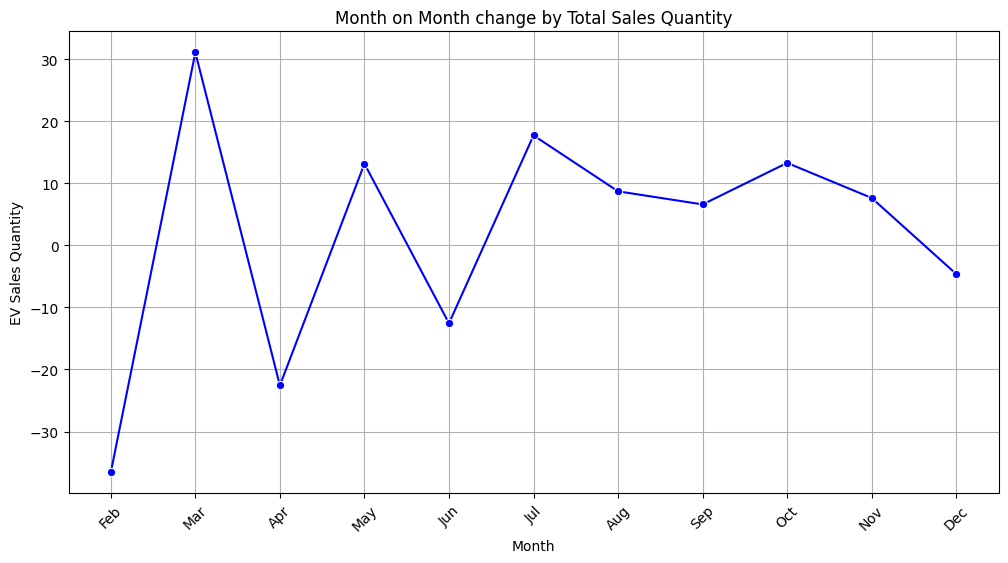

In [129]:
plt.figure(figsize=(12,6))


sns.lineplot(data=Month_on_Month_change, x="Month_Name", y="MOM",marker = "o", color = "blue")
plt.title("Month on Month change by Total Sales Quantity")
plt.xlabel("Month")
plt.ylabel("EV Sales Quantity")
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [130]:
YSS = ev.groupby(["Year","State"]).agg({"EV_Sales_Quantity" : "sum"}).reset_index()
pivot1 = YSS.pivot(index = "State", columns = "Year" , values = "EV_Sales_Quantity")
pivot1["Total_Sales"] = pivot1.sum(axis=1)
pivot1 = pivot1.sort_values(by = "Total_Sales", ascending= False)
pivot1= pivot1.drop(columns = "Total_Sales")
pivot1

Year,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
State,,,,,,,,,,,
Uttar Pradesh,139.0,1012.0,15310.0,40649.0,53212.0,55796.0,31264.0,66702.0,162857.0,277300.0,27833.0
Maharashtra,905.0,1015.0,951.0,945.0,4640.0,7319.0,7137.0,29907.0,136036.0,193935.0,18745.0
Karnataka,601.0,682.0,605.0,729.0,2302.0,6152.0,9716.0,33314.0,95934.0,151272.0,14191.0
Delhi,48.0,3565.0,21688.0,18042.0,20961.0,23222.0,12378.0,25815.0,62265.0,73487.0,7067.0
Rajasthan,87.0,676.0,3996.0,3945.0,4678.0,6633.0,5603.0,23462.0,78240.0,93818.0,7435.0
Bihar,12.0,69.0,1100.0,3593.0,8469.0,12380.0,12447.0,23082.0,55752.0,88186.0,8375.0
Tamil Nadu,196.0,86.0,86.0,118.0,1332.0,3444.0,5698.0,30030.0,66955.0,90242.0,8715.0
Gujarat,76.0,81.0,142.0,174.0,498.0,945.0,1120.0,9775.0,68997.0,88617.0,6288.0
Assam,2.0,23.0,19.0,3833.0,7403.0,10867.0,8357.0,15633.0,40720.0,60798.0,4262.0


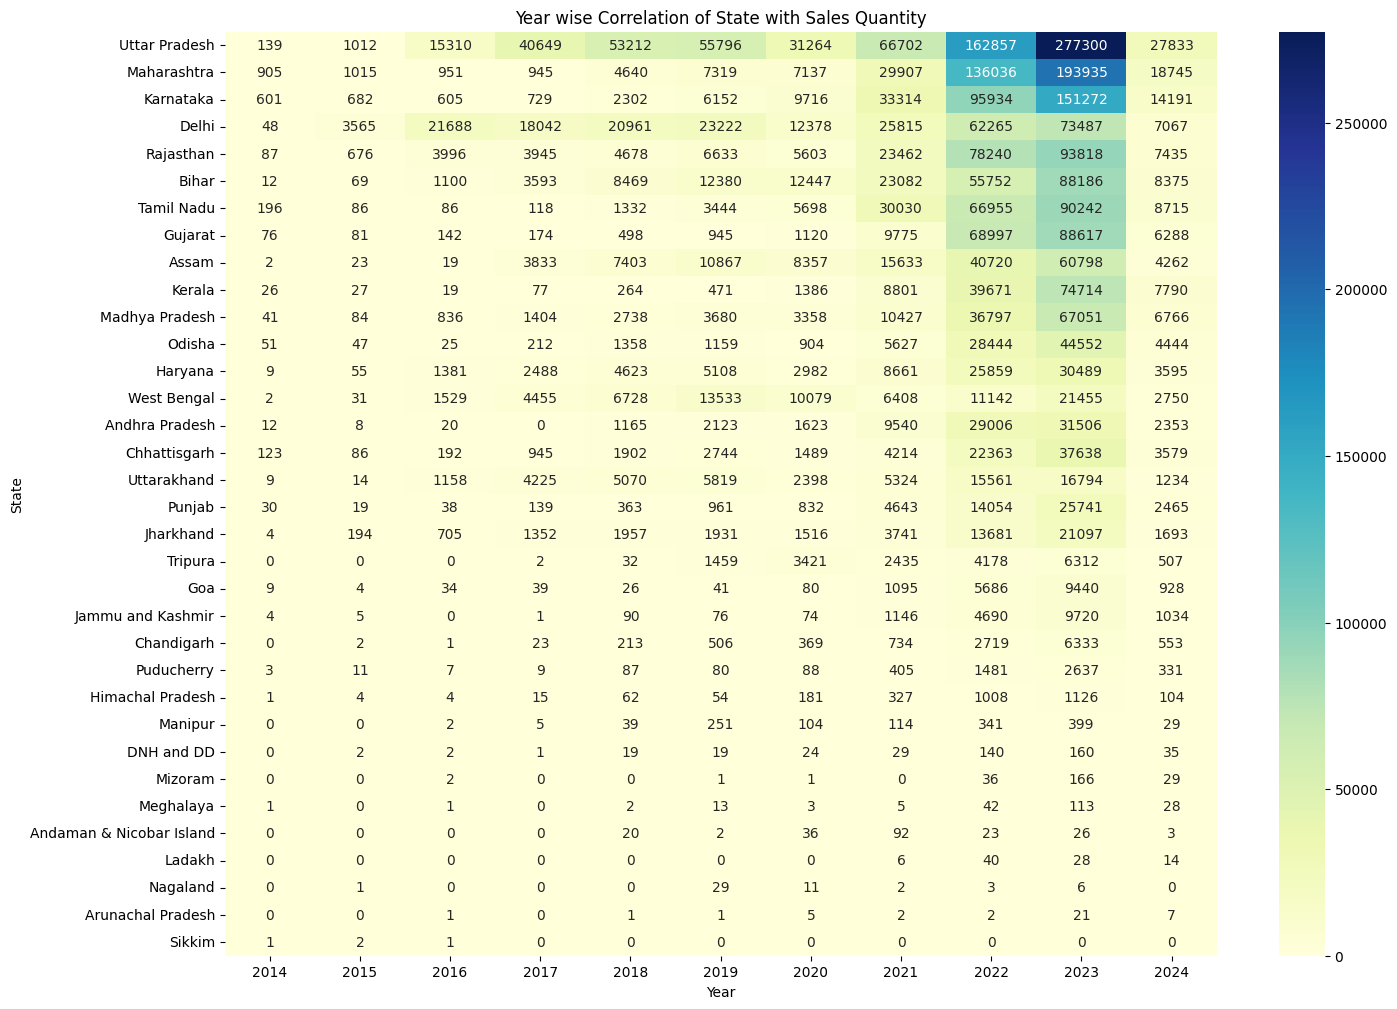

In [131]:
plt.figure(figsize=(16,12))
sns.heatmap(pivot1, cmap="YlGnBu", annot =True, fmt=".0f")
plt.title("Year wise Correlation of State with Sales Quantity")
plt.xlabel("Year")
plt.ylabel("State")
plt.show()

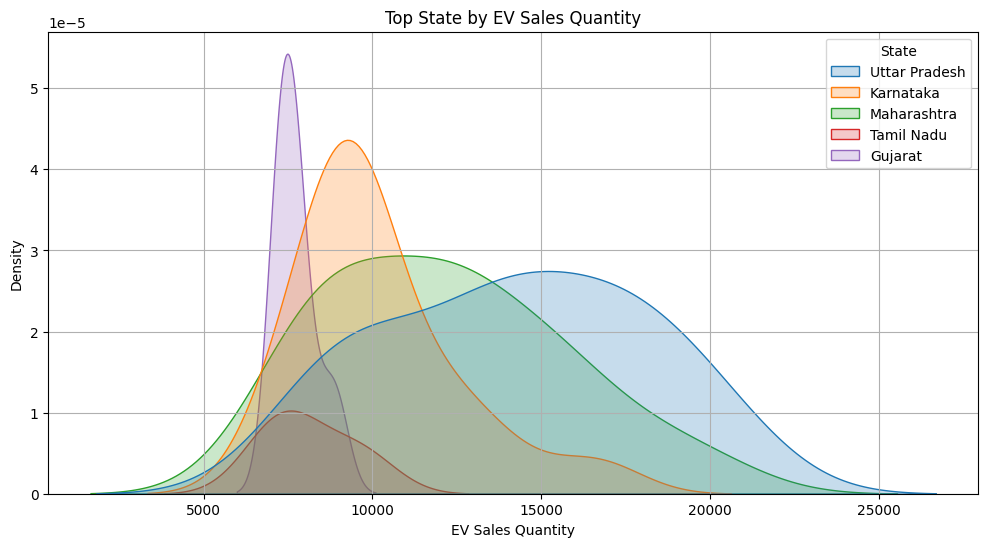

In [132]:
filter1 = ev[ev["EV_Sales_Quantity"] > 7000]
StateEv = filter1.groupby("State").agg({"EV_Sales_Quantity" : "sum"}).reset_index().sort_values(by ="EV_Sales_Quantity", ascending = False )
TopState = StateEv["State"].head(5)
Topfilter = filter1[filter1["State"].isin(TopState)]

plt.figure(figsize=(12, 6))
sns.kdeplot(data= Topfilter, x="EV_Sales_Quantity", hue="State", fill=True)
plt.title("Top State by EV Sales Quantity")
plt.xlabel("EV Sales Quantity")
plt.ylabel("Density")
plt.grid()
plt.show()